In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler



https://www.geeksforgeeks.org/decision-tree-implementation-python/

**Defining Functions**

In [155]:
def train_using_gini(X_train, X_test, y_train, depth = 10):

    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion="gini",
                                      random_state=100, max_depth = depth, min_samples_leaf=5)

    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini
def train_using_entropy(X_train, X_test, y_train, depth = 10):

    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
        criterion="entropy", random_state=100,
        max_depth=depth, min_samples_leaf=5)

    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy
# Function to make predictions
def prediction(X_test, clf_object):
    y_pred = clf_object.predict(X_test)
    # print("Predicted values:")
    # print(y_pred)
    return y_pred

def calc_accuracy(y_test, y_pred, class_names):
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Create a DataFrame for the confusion matrix
    df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
    
    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sn.set(font_scale=1.2) 
    sn.heatmap(df_cm, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 14})
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()
    
    # Print accuracy and classification report
    print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
    print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=class_names))


def plot_decision_tree(clf_object, feature_names, class_names):
    plt.figure(figsize=(15, 10))
    plot_tree(clf_object, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
    plt.show()

**Heart Data**


In [156]:
file_path = "heart+disease/processed.cleveland.data"
column_names = ['age', 'sex', 'chest pain type','resting blood pressure' , 'cholesteral', 'fasting blood sugar < 120', 'resting ecg', 'max heart rate', 'exercise induced angina', 'oldpeak', 'slope', 'number of vessels colored', 'thal', 'class']
heart_data = pd.read_csv(file_path, delimiter=",", header=None, names=column_names)
heart_data
# Class: 0 is healathy, 1-4 is disease
for i in range(len(heart_data)):
    if heart_data['class'].iloc[i] != 0:
        heart_data.loc[i, "class"] = 1
    else:
        continue

# heart_data.info()
heart_data['number of vessels colored'] = pd.to_numeric(heart_data['number of vessels colored'], errors='coerce')
heart_data['thal'] = pd.to_numeric(heart_data['thal'], errors='coerce')

heart_data.dropna(inplace=True)

shuffled_heart_data = heart_data.sample(frac=1)
shuffled_heart_data.reset_index(inplace = True, drop = True)

In [157]:
Class = ['class']
Features = ['age', 'sex', 'chest pain type','resting blood pressure' , 'cholesteral', 'fasting blood sugar < 120', 'resting ecg', 'max heart rate', 'exercise induced angina', 'oldpeak', 'slope', 'number of vessels colored', 'thal']

X = shuffled_heart_data[Features].values
Y = shuffled_heart_data[Class].values

PredictorScaler=StandardScaler()
PredictorScalerFit=PredictorScaler.fit(X)

X=PredictorScalerFit.transform(X)

Train size .2 (20/80)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=42)

print(X_train.shape, X_test.shape)

(59, 13) (238, 13)


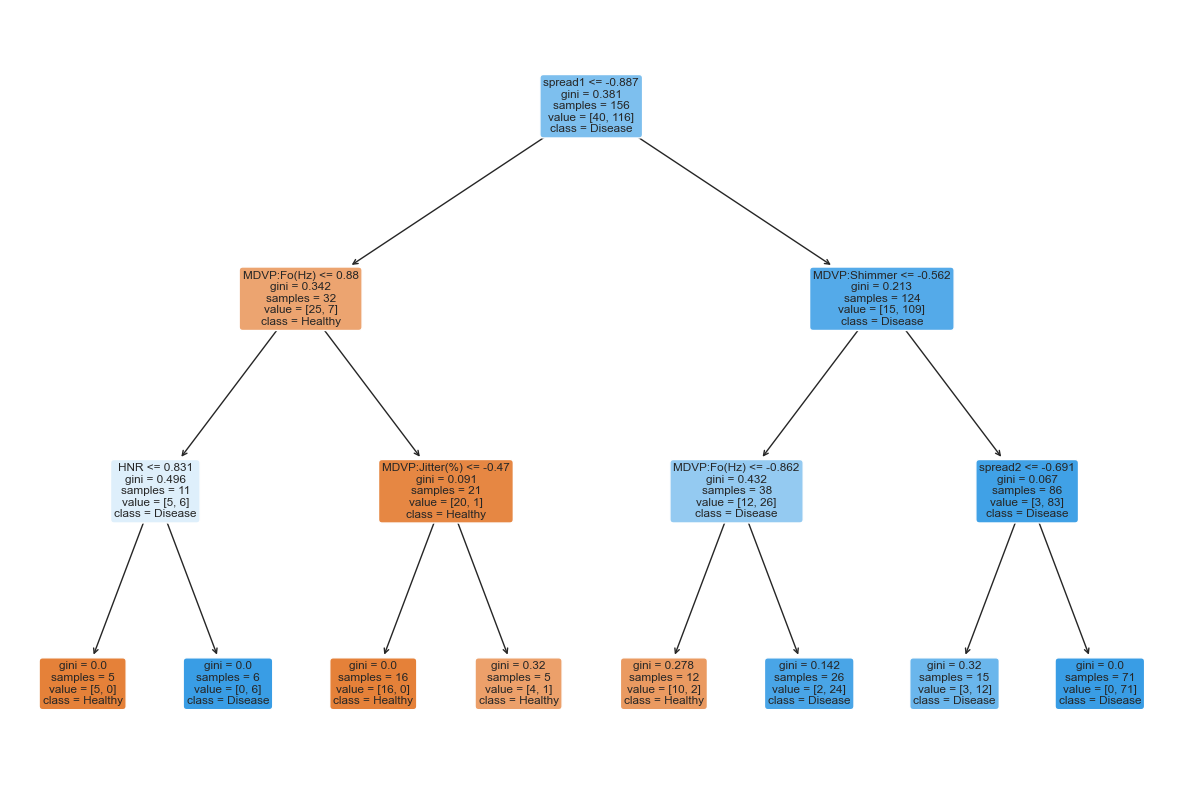

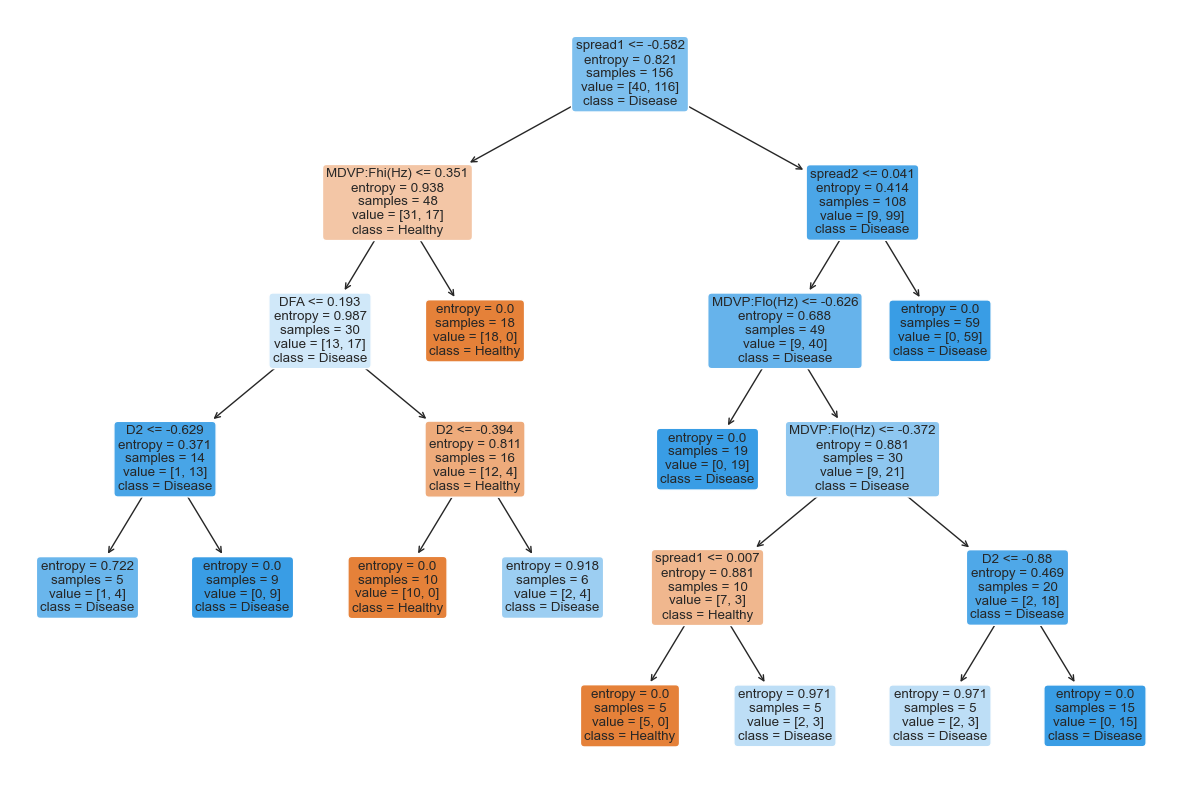

In [114]:
class_names = ['Healthy', 'Disease']  # Modify this to represent your actual class labels
clf_gini = train_using_gini(X_train, X_test, y_train, 3)
clf_entropy = train_using_entropy(X_train, X_test, y_train)
# Visualizing the Decision Trees
plot_decision_tree(clf_gini, Features, class_names)
plot_decision_tree(clf_entropy, Features, class_names)


Results Using Gini Index:


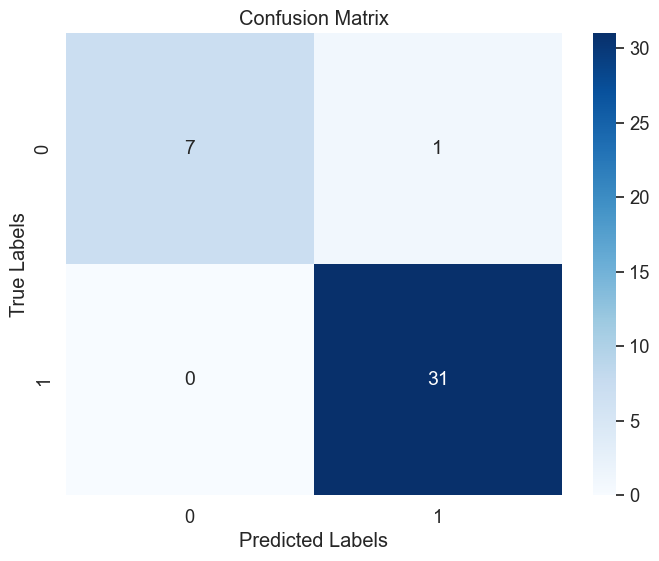

Accuracy: 97.44%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.97      1.00      0.98        31

    accuracy                           0.97        39
   macro avg       0.98      0.94      0.96        39
weighted avg       0.98      0.97      0.97        39



In [115]:
class_names = [str(label) for label in np.unique(y_test)]
print("Results Using Gini Index:")
y_pred_gini = prediction(X_test, clf_gini)
calc_accuracy(y_test, y_pred_gini, class_names)

Results Using Entropy:


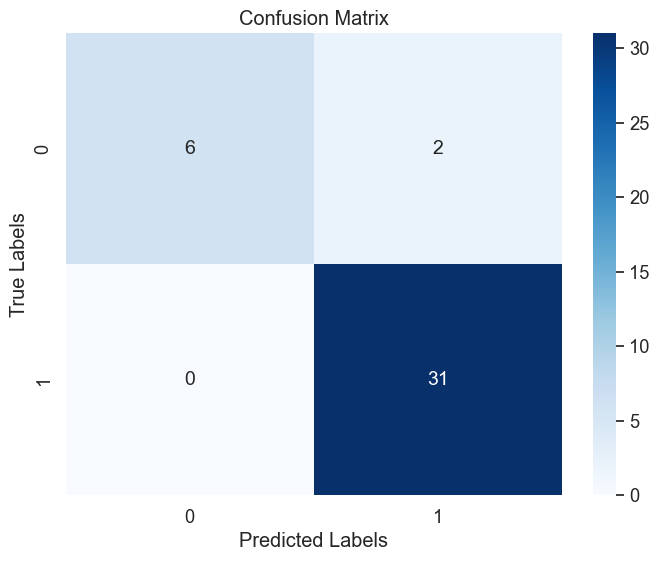

Accuracy: 94.87%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.94      1.00      0.97        31

    accuracy                           0.95        39
   macro avg       0.97      0.88      0.91        39
weighted avg       0.95      0.95      0.95        39



In [116]:
class_names = [str(label) for label in np.unique(y_test)]
print("Results Using Entropy:")
y_pred_entropy = prediction(X_test, clf_entropy)
calc_accuracy(y_test, y_pred_entropy, class_names)

Train Size .5 (50/50)

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)
print(X_train.shape, X_test.shape)

(97, 11) (98, 11)


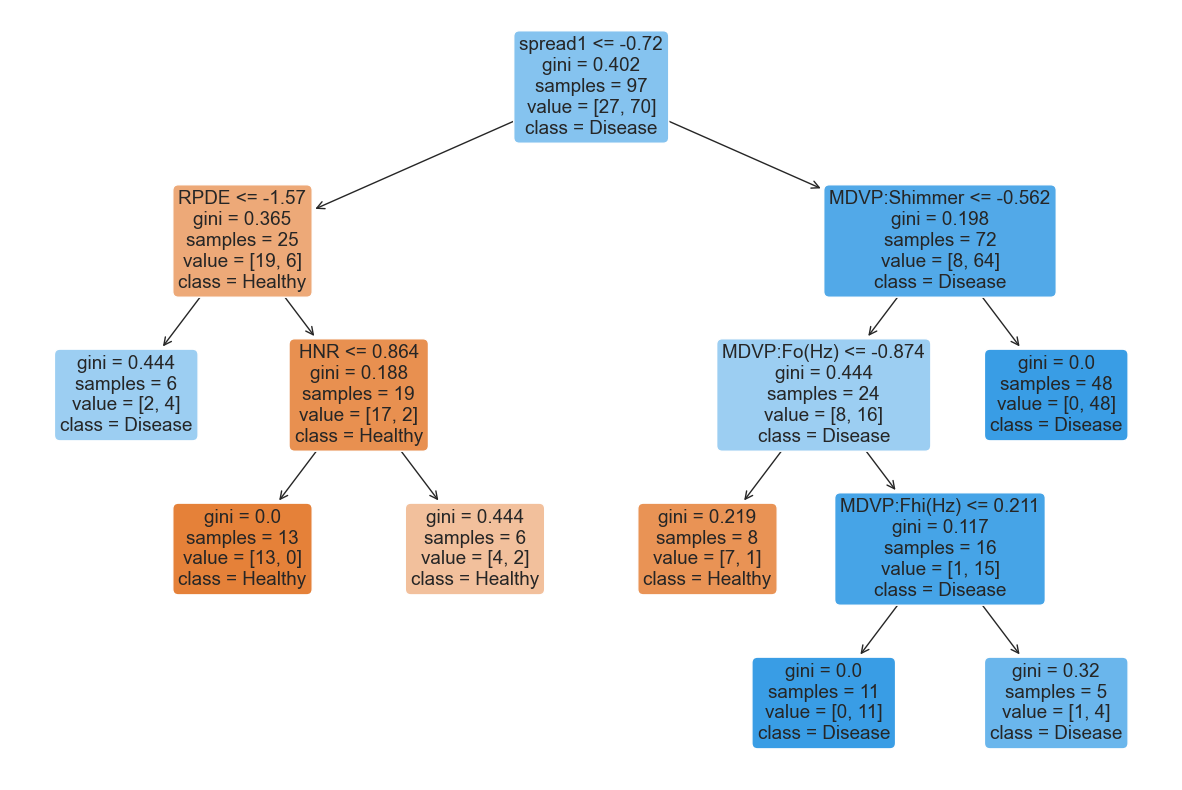

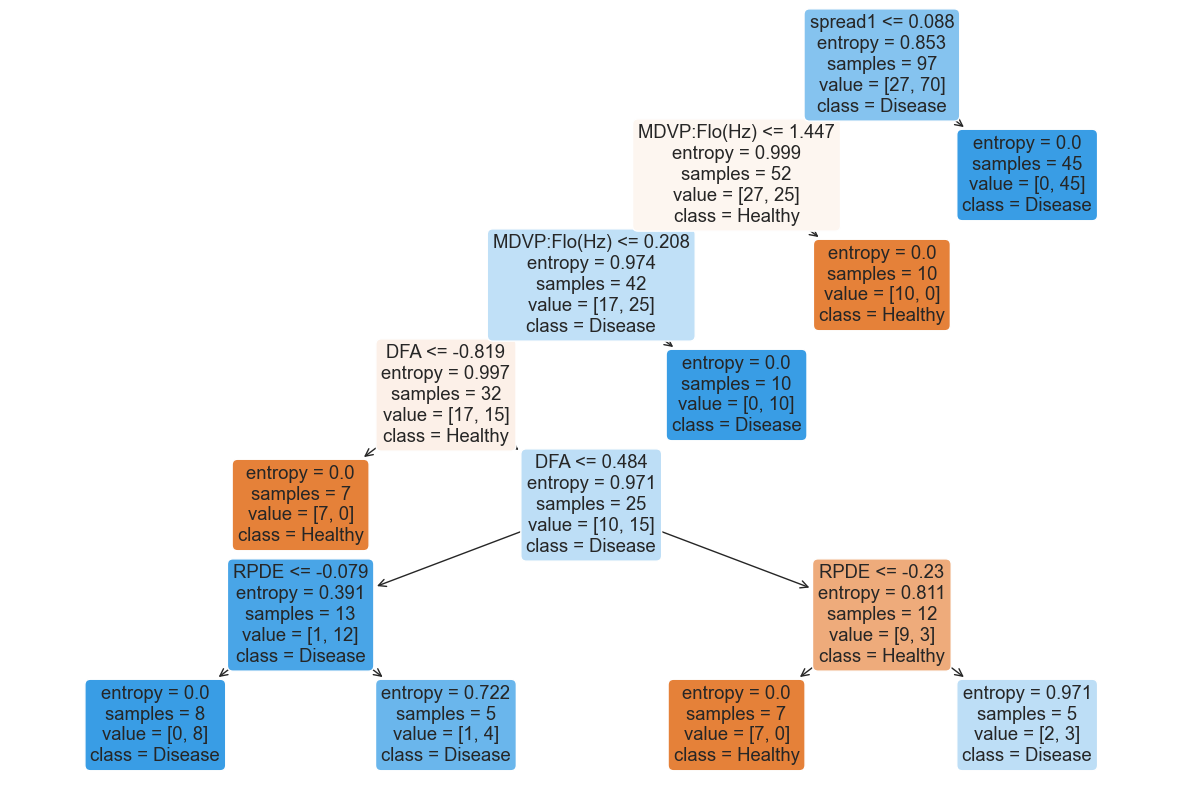

In [118]:
class_names = ['Healthy', 'Disease']  # Modify this to represent your actual class labels
clf_gini = train_using_gini(X_train, X_test, y_train)
clf_entropy = train_using_entropy(X_train, X_test, y_train)
# Visualizing the Decision Trees
plot_decision_tree(clf_gini, Features, class_names)
plot_decision_tree(clf_entropy, Features, class_names)


Results Using Gini Index:


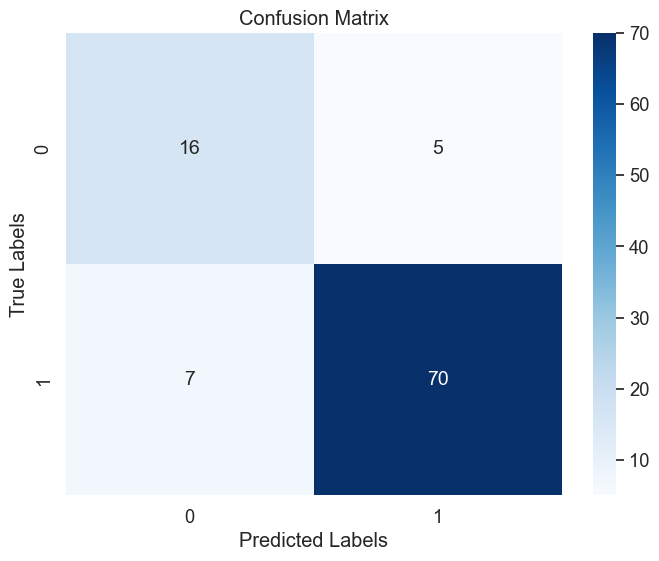

Accuracy: 87.76%

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.76      0.73        21
           1       0.93      0.91      0.92        77

    accuracy                           0.88        98
   macro avg       0.81      0.84      0.82        98
weighted avg       0.88      0.88      0.88        98

Results Using Entropy:


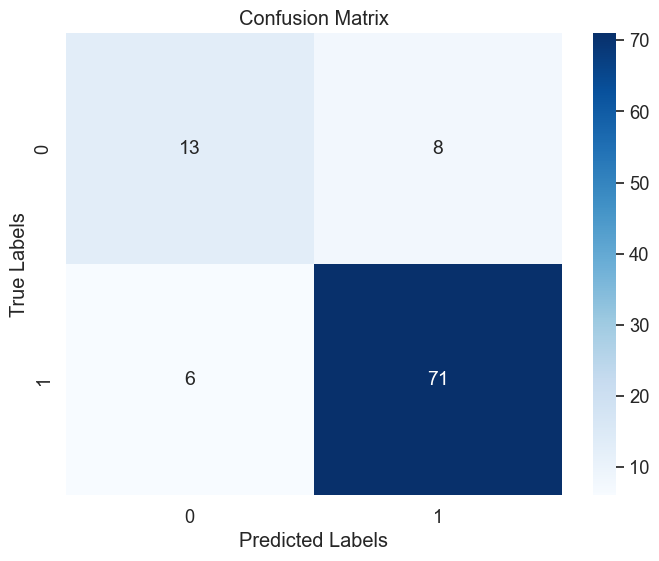

Accuracy: 85.71%

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.62      0.65        21
           1       0.90      0.92      0.91        77

    accuracy                           0.86        98
   macro avg       0.79      0.77      0.78        98
weighted avg       0.85      0.86      0.85        98



In [119]:
class_names = [str(label) for label in np.unique(y_test)]
print("Results Using Gini Index:")
y_pred_gini = prediction(X_test, clf_gini)
calc_accuracy(y_test, y_pred_gini, class_names)

class_names = [str(label) for label in np.unique(y_test)]
print("Results Using Entropy:")
y_pred_entropy = prediction(X_test, clf_entropy)
calc_accuracy(y_test, y_pred_entropy, class_names)

Train size .8 (80/20)

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(156, 11) (39, 11)


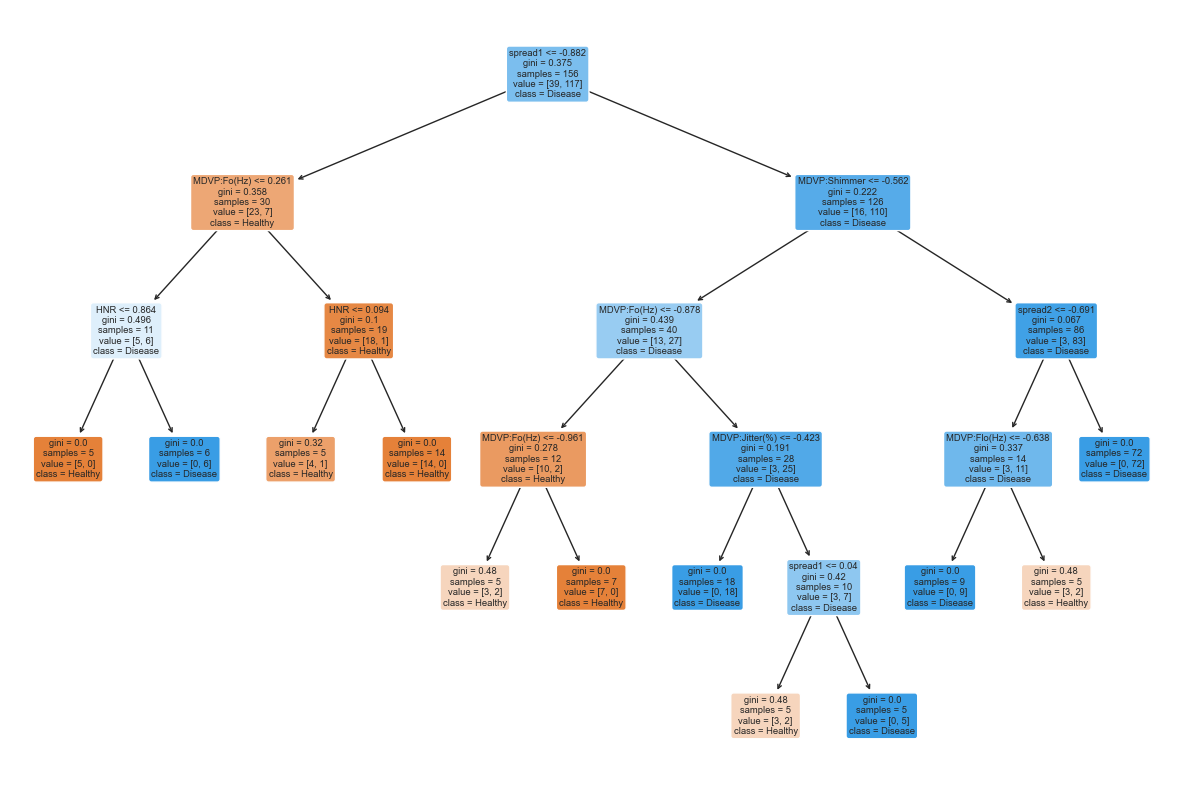

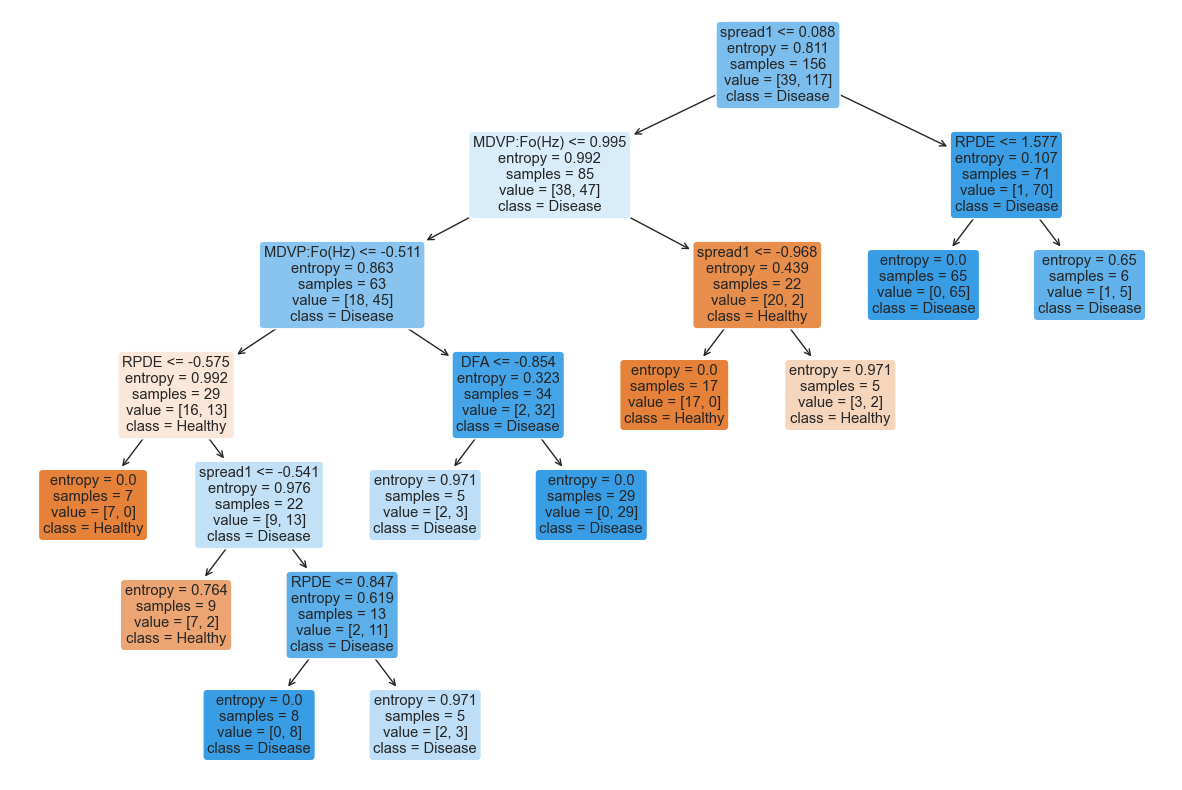

In [121]:
class_names = ['Healthy', 'Disease']  # Modify this to represent your actual class labels
clf_gini = train_using_gini(X_train, X_test, y_train)
clf_entropy = train_using_entropy(X_train, X_test, y_train)
# Visualizing the Decision Trees
plot_decision_tree(clf_gini, Features, class_names)
plot_decision_tree(clf_entropy, Features, class_names)


Results Using Gini Index:


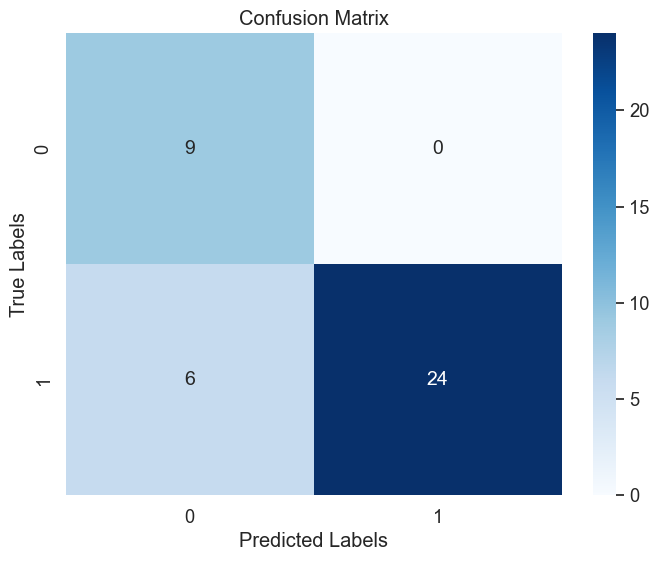

Accuracy: 84.62%

Classification Report:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75         9
           1       1.00      0.80      0.89        30

    accuracy                           0.85        39
   macro avg       0.80      0.90      0.82        39
weighted avg       0.91      0.85      0.86        39

Results Using Entropy:


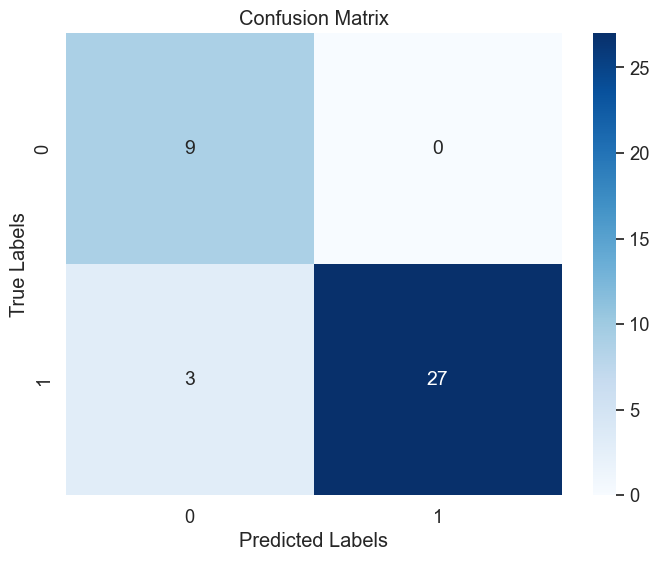

Accuracy: 92.31%

Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86         9
           1       1.00      0.90      0.95        30

    accuracy                           0.92        39
   macro avg       0.88      0.95      0.90        39
weighted avg       0.94      0.92      0.93        39



In [122]:
class_names = [str(label) for label in np.unique(y_test)]
print("Results Using Gini Index:")
y_pred_gini = prediction(X_test, clf_gini)
calc_accuracy(y_test, y_pred_gini, class_names)

class_names = [str(label) for label in np.unique(y_test)]
print("Results Using Entropy:")
y_pred_entropy = prediction(X_test, clf_entropy)
calc_accuracy(y_test, y_pred_entropy, class_names)

**Parkinsons Data**

In [158]:
file_path = "parkinsons/parkinsons.data"
parkin_data = pd.read_csv(file_path, delimiter=",", header=0)
parkin_data.drop(columns=parkin_data.columns[0], inplace=True)

parkin_data.dropna(inplace=True)

correlation_matrix = parkin_data.corr()

upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]
parkin_data_reduced = parkin_data.drop(columns=to_drop)
shuffled_park_data = parkin_data_reduced.sample(frac=1)
shuffled_park_data.reset_index(inplace = True, drop = True)

TargetVal = ['status']
feat_list = list(parkin_data_reduced.columns)
feat_list.remove('status')
Features = feat_list
X = shuffled_park_data[Features].values
Y = shuffled_park_data[TargetVal].values


PredictorScaler=StandardScaler()
PredictorScalerFit=PredictorScaler.fit(X)
X=PredictorScalerFit.transform(X)

Train size .2 (20/80)

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=42)

print(X_train.shape, X_test.shape)

(39, 11) (156, 11)


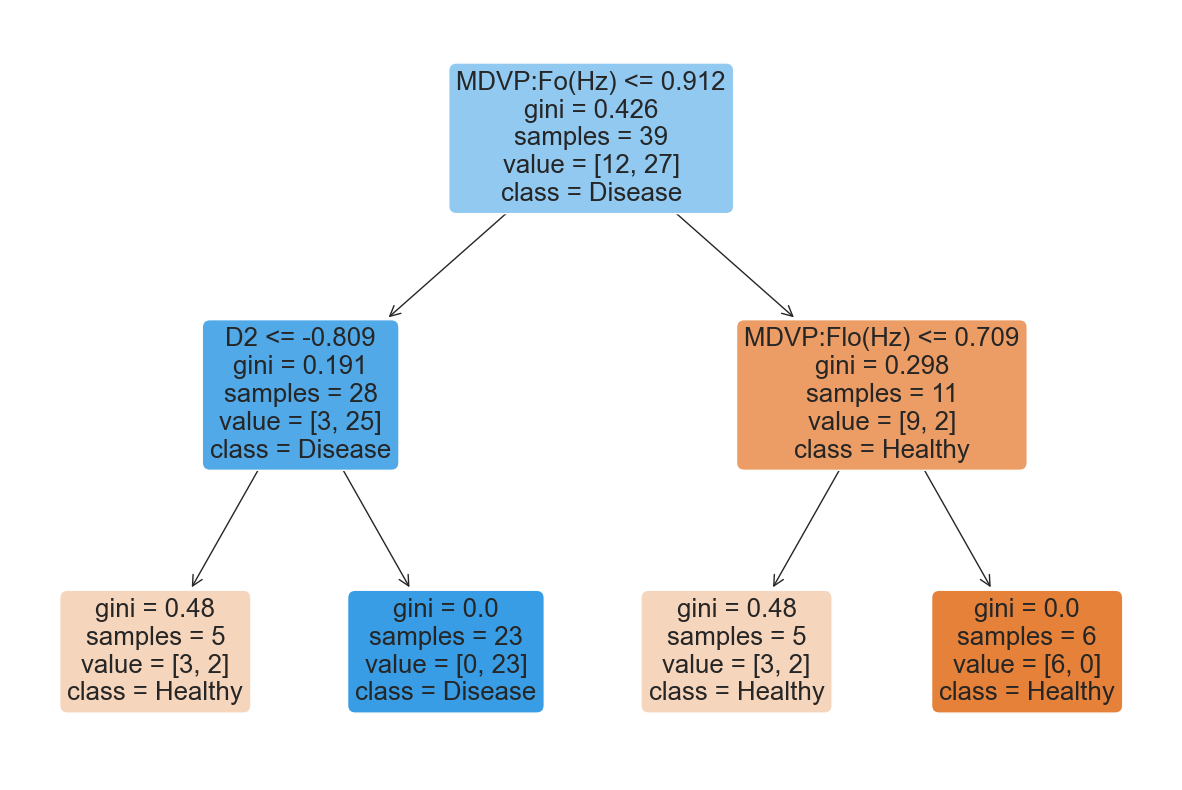

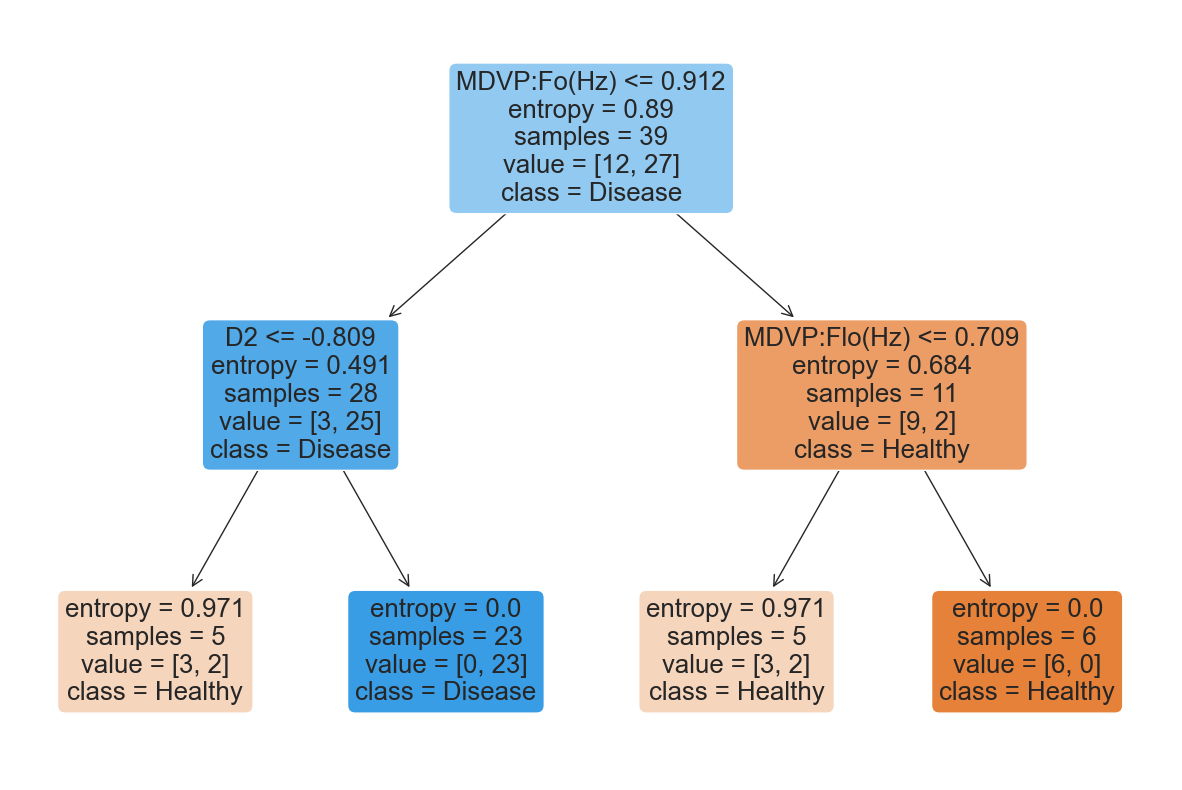

In [160]:
class_names = ['Healthy', 'Disease']  # Modify this to represent your actual class labels
clf_gini = train_using_gini(X_train, X_test, y_train)
clf_entropy = train_using_entropy(X_train, X_test, y_train)
# Visualizing the Decision Trees
plot_decision_tree(clf_gini, Features, class_names)
plot_decision_tree(clf_entropy, Features, class_names)


Results Using Gini Index:


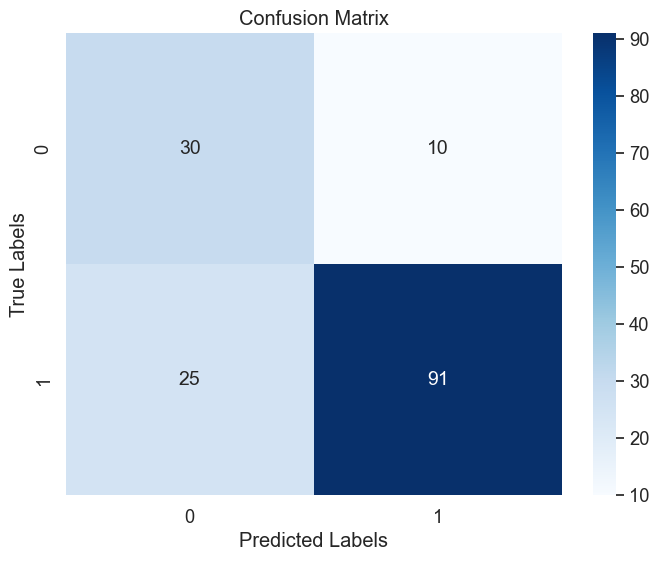

Accuracy: 77.56%

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.75      0.63        40
           1       0.90      0.78      0.84       116

    accuracy                           0.78       156
   macro avg       0.72      0.77      0.74       156
weighted avg       0.81      0.78      0.79       156

Results Using Entropy:


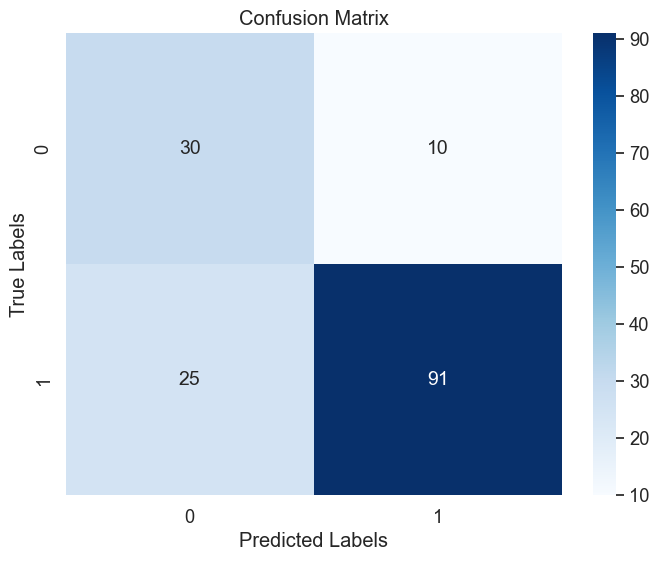

Accuracy: 77.56%

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.75      0.63        40
           1       0.90      0.78      0.84       116

    accuracy                           0.78       156
   macro avg       0.72      0.77      0.74       156
weighted avg       0.81      0.78      0.79       156



In [126]:
class_names = [str(label) for label in np.unique(y_test)]
print("Results Using Gini Index:")
y_pred_gini = prediction(X_test, clf_gini)
calc_accuracy(y_test, y_pred_gini, class_names)

class_names = [str(label) for label in np.unique(y_test)]
print("Results Using Entropy:")
y_pred_entropy = prediction(X_test, clf_entropy)
calc_accuracy(y_test, y_pred_entropy, class_names)

Train size .5 (50/50)


In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

print(X_train.shape, X_test.shape)

(97, 11) (98, 11)


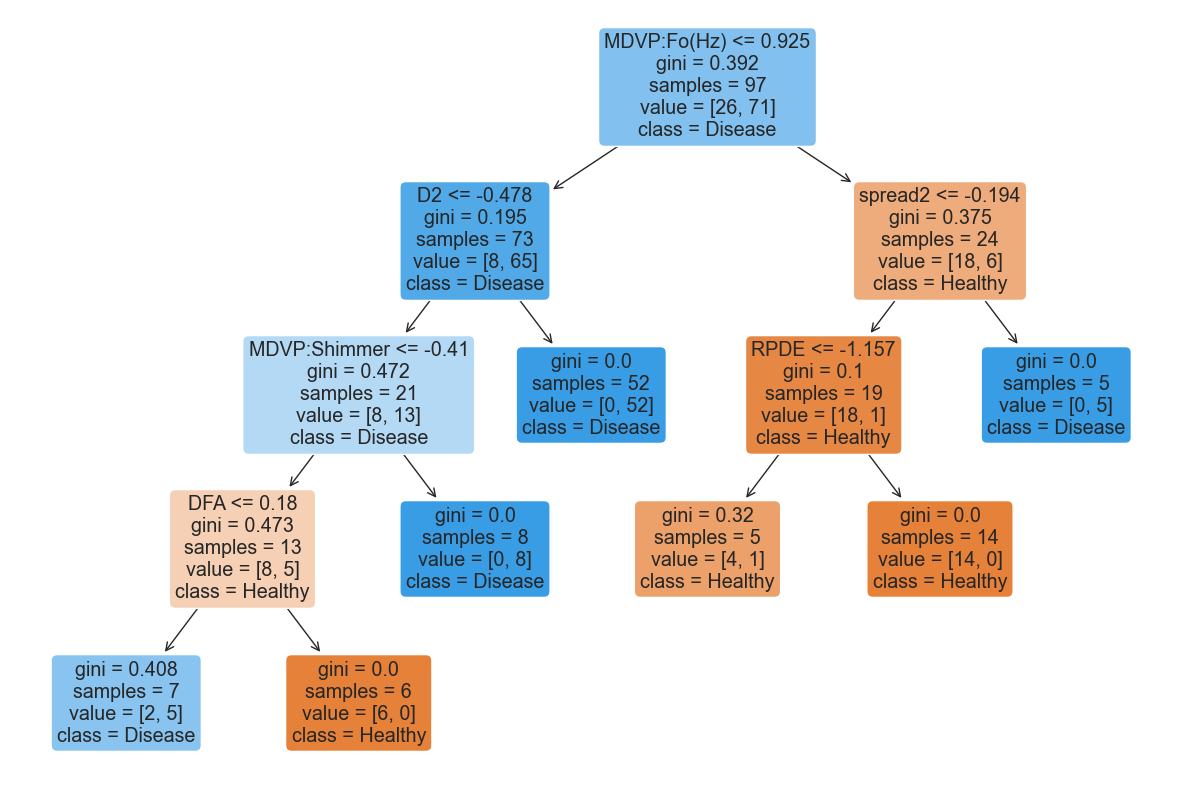

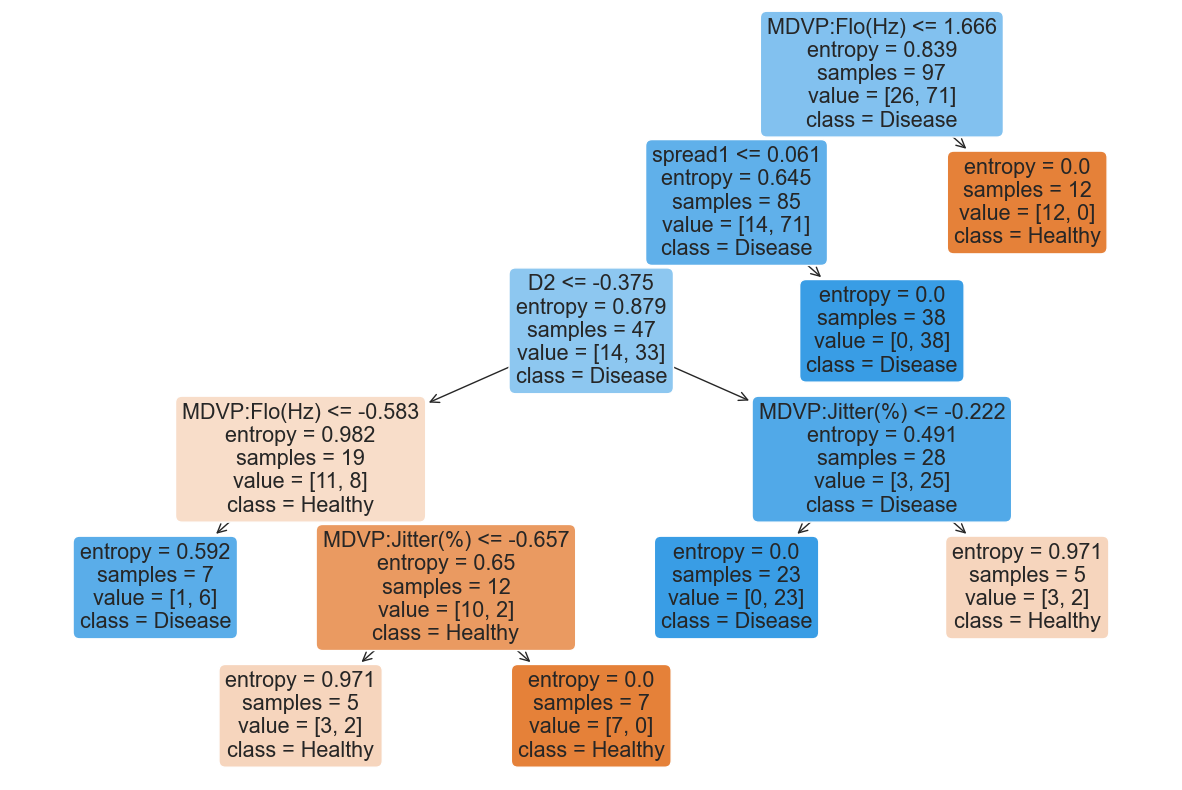

In [162]:
class_names = ['Healthy', 'Disease']  # Modify this to represent your actual class labels
clf_gini = train_using_gini(X_train, X_test, y_train)
clf_entropy = train_using_entropy(X_train, X_test, y_train)
# Visualizing the Decision Trees
plot_decision_tree(clf_gini, Features, class_names)
plot_decision_tree(clf_entropy, Features, class_names)


Results Using Gini Index:


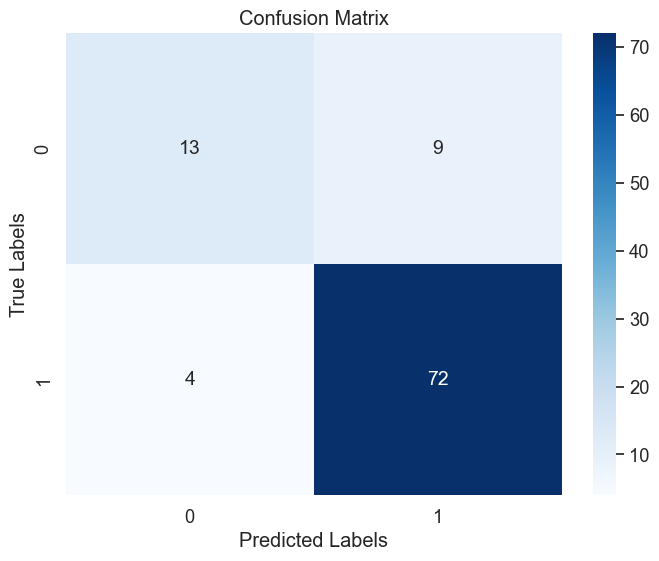

Accuracy: 86.73%

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.59      0.67        22
           1       0.89      0.95      0.92        76

    accuracy                           0.87        98
   macro avg       0.83      0.77      0.79        98
weighted avg       0.86      0.87      0.86        98

Results Using Entropy:


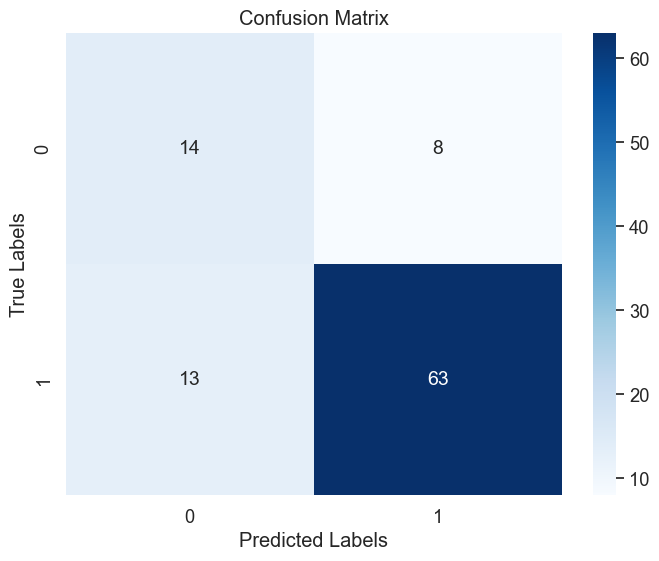

Accuracy: 78.57%

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.64      0.57        22
           1       0.89      0.83      0.86        76

    accuracy                           0.79        98
   macro avg       0.70      0.73      0.71        98
weighted avg       0.80      0.79      0.79        98



In [163]:
class_names = [str(label) for label in np.unique(y_test)]
print("Results Using Gini Index:")
y_pred_gini = prediction(X_test, clf_gini)
calc_accuracy(y_test, y_pred_gini, class_names)

class_names = [str(label) for label in np.unique(y_test)]
print("Results Using Entropy:")
y_pred_entropy = prediction(X_test, clf_entropy)
calc_accuracy(y_test, y_pred_entropy, class_names)

Train size 0.8 (80/20)

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)

(156, 11) (39, 11)


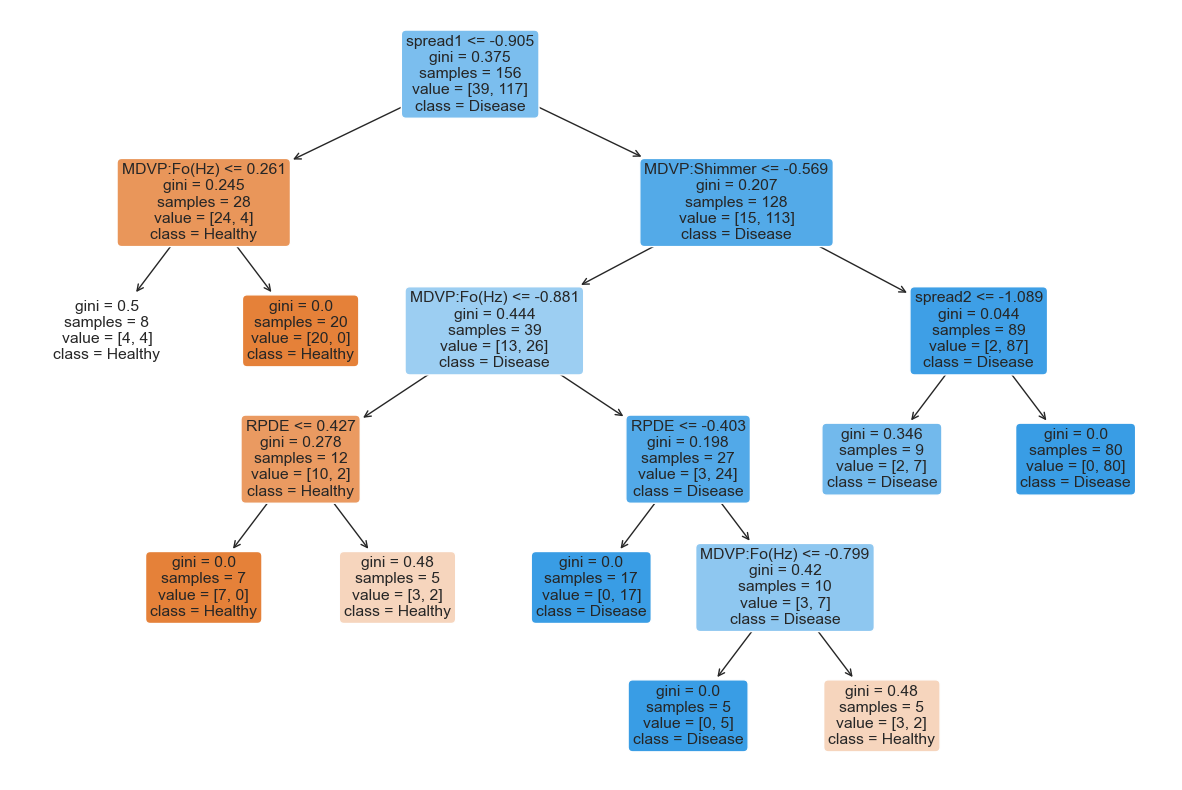

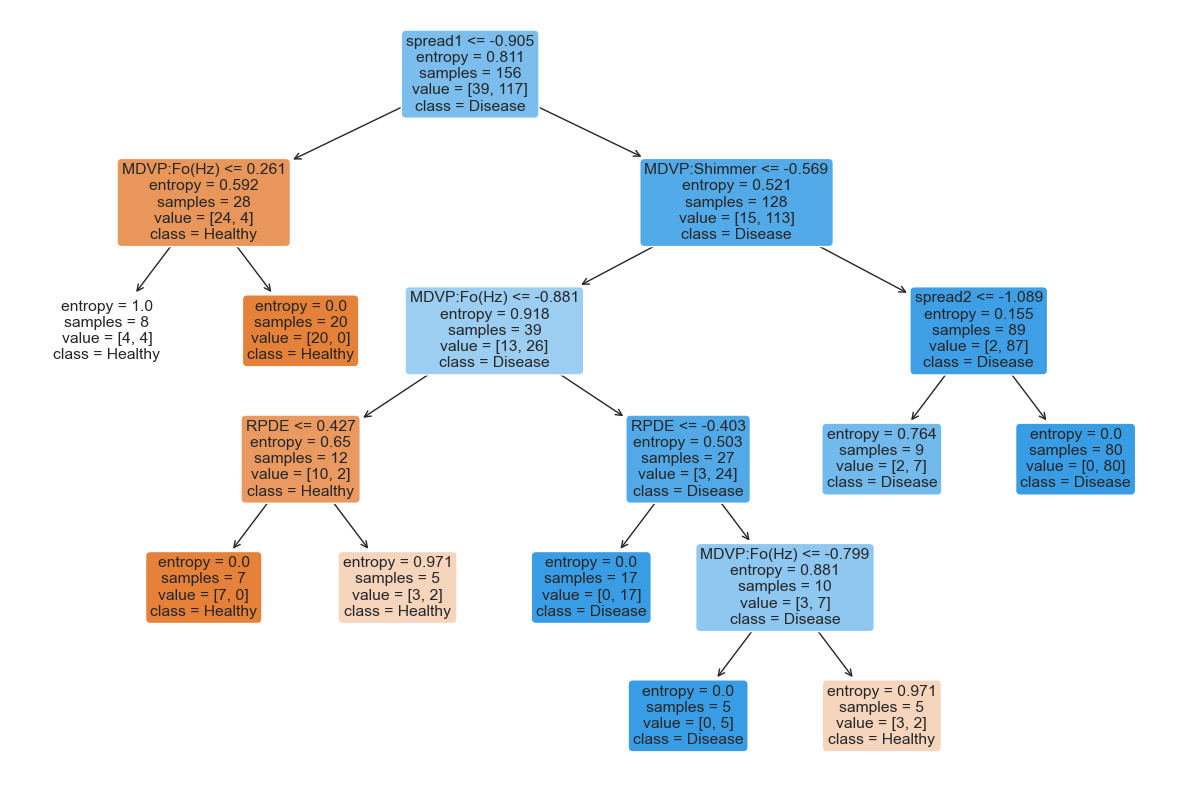

In [130]:
class_names = ['Healthy', 'Disease']  # Modify this to represent your actual class labels
clf_gini = train_using_gini(X_train, X_test, y_train)
clf_entropy = train_using_entropy(X_train, X_test, y_train)
# Visualizing the Decision Trees
plot_decision_tree(clf_gini, Features, class_names)
plot_decision_tree(clf_entropy, Features, class_names)


Results Using Gini Index:


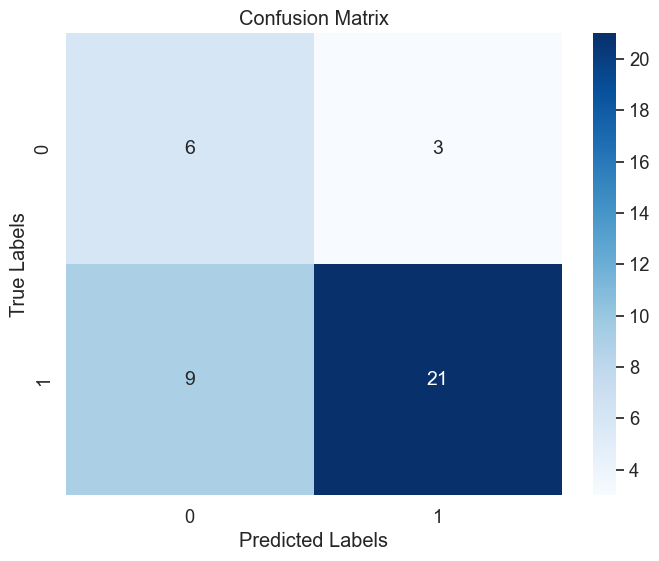

Accuracy: 69.23%

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.67      0.50         9
           1       0.88      0.70      0.78        30

    accuracy                           0.69        39
   macro avg       0.64      0.68      0.64        39
weighted avg       0.77      0.69      0.71        39

Results Using Entropy:


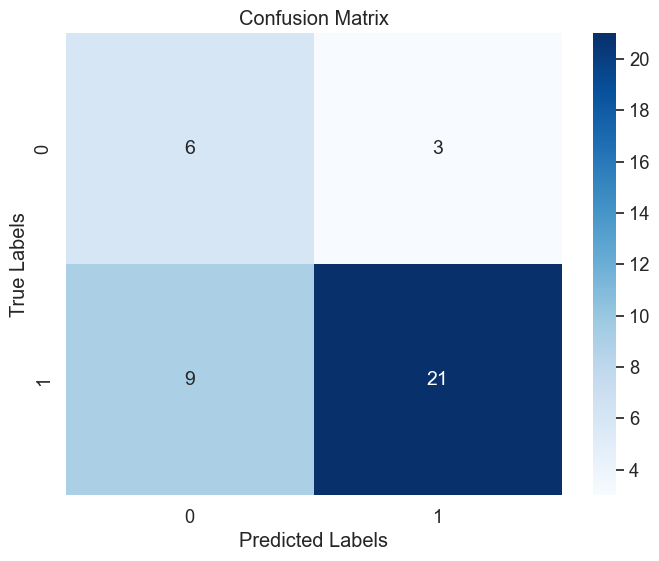

Accuracy: 69.23%

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.67      0.50         9
           1       0.88      0.70      0.78        30

    accuracy                           0.69        39
   macro avg       0.64      0.68      0.64        39
weighted avg       0.77      0.69      0.71        39



In [132]:
class_names = [str(label) for label in np.unique(y_test)]
print("Results Using Gini Index:")
y_pred_gini = prediction(X_test, clf_gini)
calc_accuracy(y_test, y_pred_gini, class_names)

class_names = [str(label) for label in np.unique(y_test)]
print("Results Using Entropy:")
y_pred_entropy = prediction(X_test, clf_entropy)
calc_accuracy(y_test, y_pred_entropy, class_names)

**Breast Cancer Data**

In [133]:
file_path = "breast+cancer/breast-cancer.data"
column_names = ['class', 'age', 'menopause', 'tumor size', 'inv nodes', 'node capes', 'deg malig', 'breast', 'breast quad', 'irradiat'] 
print(len(column_names))
breast_data =  pd.read_csv(file_path, delimiter=",", header=None, names=column_names)

class_map = {'no-recurrence-events': 0, 'recurrence-events' : 1} #0 is healthy

age_mapping = {
    '10-19': 15,
    '20-29': 25,
    '30-39': 35,
    '40-49': 45,
    '50-59': 55,
    '60-69': 65,
    '70-79': 75,
    '80-89': 85,
    '90-99': 95
}
meno_mapping = {
    'lt40' : 0,
    'ge40' : 1,
    'premeno' : 2
}
size_mapping = {
'0-4' : 2,
'5-9' : 7,
'10-14' : 12,
'15-19' : 17,
'20-24' : 22,
'25-29' : 27,
'30-34' : 32,
'35-39' : 37,
'40-44' : 42,
'45-49' : 47,
'50-54' : 52,
'55-59' : 57
}

node_mapping = {
'0-2' : 2,
'3-5' : 5,
'6-8' : 8,
'9-11' : 11,
'12-14' : 14,
'15-17' : 17,
'18-20' : 20,
'21-23' : 23,
'24-26' : 26,
'27-29' : 29,
'30-32' : 32,
'33-35' : 35,
'36-39' : 39
}
y_n_map = {'yes': 0, 'no':1}
side_map = {'left': 0, 'right':1}
quad_map = {
'left_up' : 0,
'left_low' : 1,
'right_up' : 2,
'right_low' : 3,
'central' : 4,
}
breast_data['class'] = breast_data['class'].replace(class_map)
breast_data['age'] = breast_data['age'].replace(age_mapping)
breast_data['menopause'] = breast_data['menopause'].replace(meno_mapping)
breast_data['tumor size'] = breast_data['tumor size'].replace(size_mapping)
breast_data['inv nodes'] = breast_data['inv nodes'].replace(node_mapping)
breast_data['node capes'] = breast_data['node capes'].replace(y_n_map)
breast_data['breast'] = breast_data['breast'].replace(side_map)
breast_data['breast quad'] = breast_data['breast quad'].replace(quad_map)
breast_data['irradiat'] = breast_data['irradiat'].replace(y_n_map)

breast_data['node capes'] = pd.to_numeric(breast_data['node capes'], errors='coerce')
breast_data['breast quad'] = pd.to_numeric(breast_data['breast quad'], errors='coerce')

breast_data.dropna(inplace=True) #Dropped 9 entries, as Nan
# breast_data.info()

shuffled_breast_data = breast_data.sample(frac=1)
shuffled_breast_data.reset_index(inplace = True, drop = True)


10


/var/folders/1r/9xqq4jbj1bxc93bgtfzf_0w40000gn/T/ipykernel_37430/2505692527.py:63: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  breast_data['class'] = breast_data['class'].replace(class_map)
/var/folders/1r/9xqq4jbj1bxc93bgtfzf_0w40000gn/T/ipykernel_37430/2505692527.py:64: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  breast_data['age'] = breast_data['age'].replace(age_mapping)
/var/folders/1r/9xqq4jbj1bxc93bgtfzf_0w40000gn/T/ipykernel_37430/2505692527.py:65: FutureWarning: Downcasting behavior in `replace` is deprecated and will

In [146]:
Class = ['class']
feat_list = list(breast_data.columns)
feat_list.remove('class')
Features = feat_list

X = shuffled_breast_data[Features].values
Y = shuffled_breast_data[Class].values

PredictorScaler=StandardScaler()
PredictorScalerFit=PredictorScaler.fit(X)

X=PredictorScalerFit.transform(X)

Train size .2 (20/80)

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=42)

print(X_train.shape, X_test.shape)

(55, 9) (222, 9)


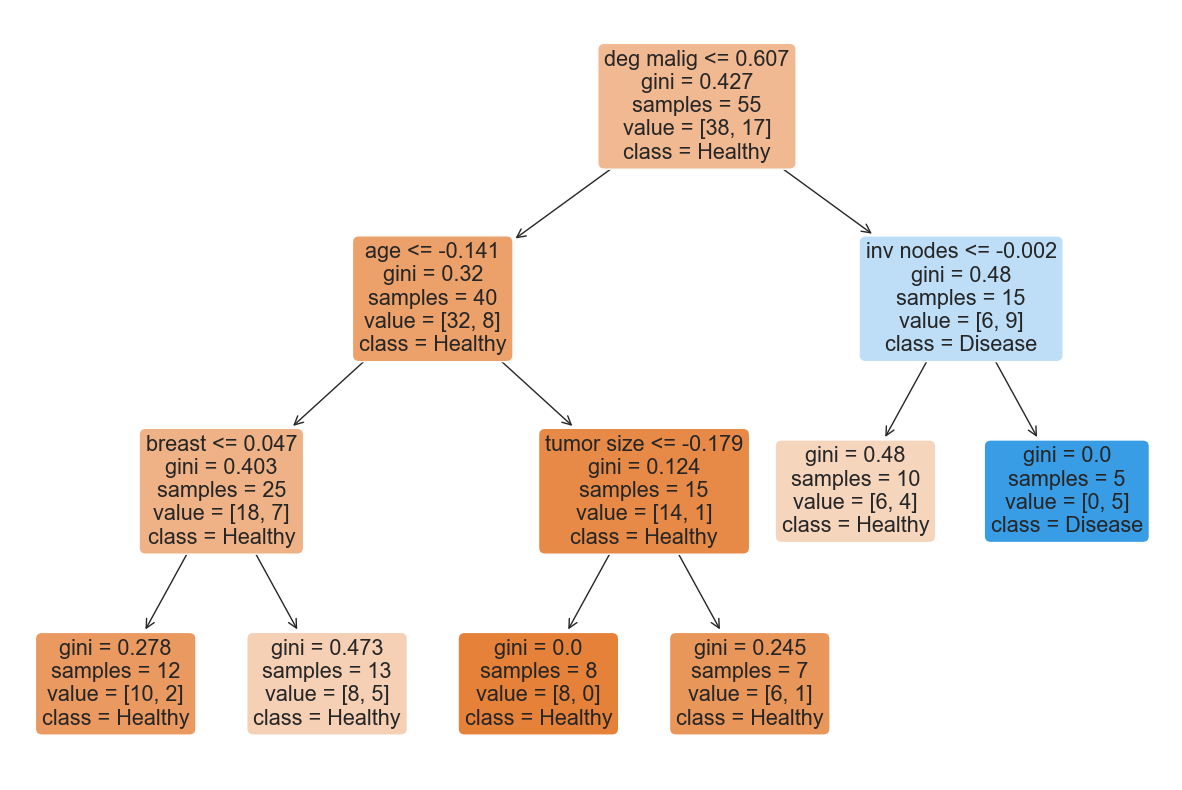

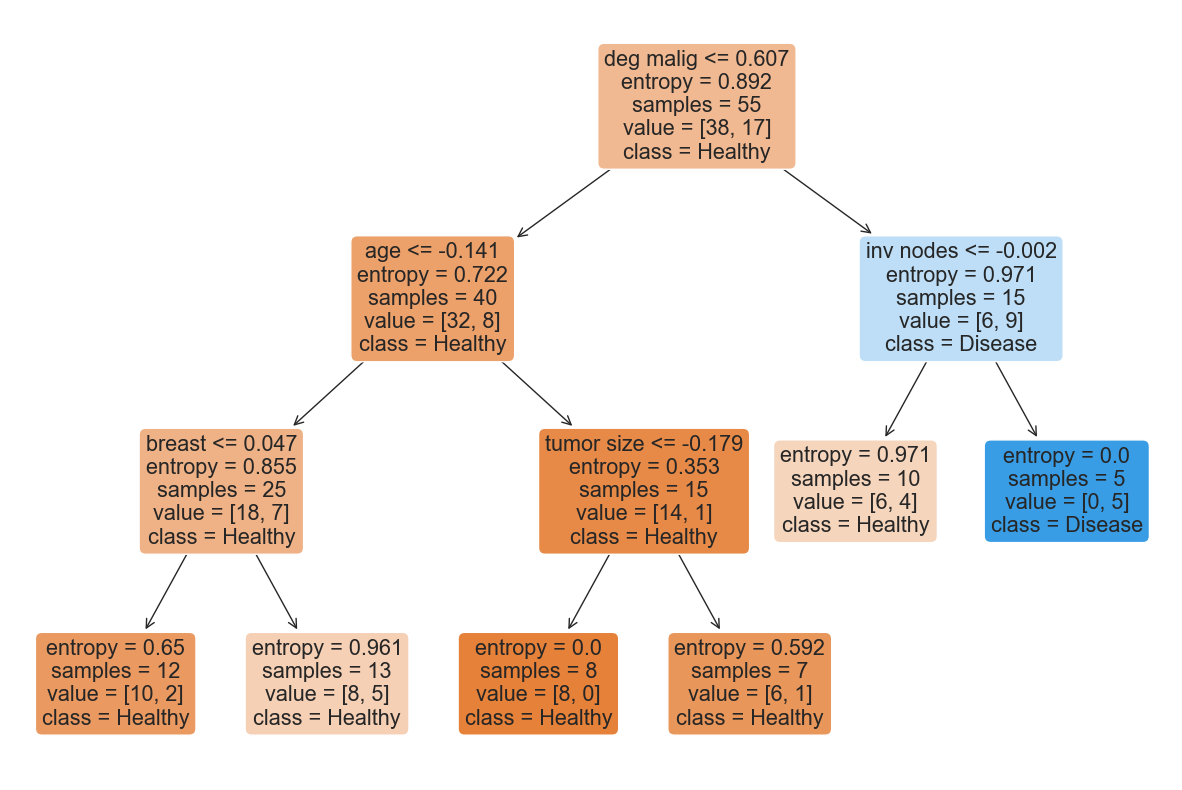

Results Using Gini Index:


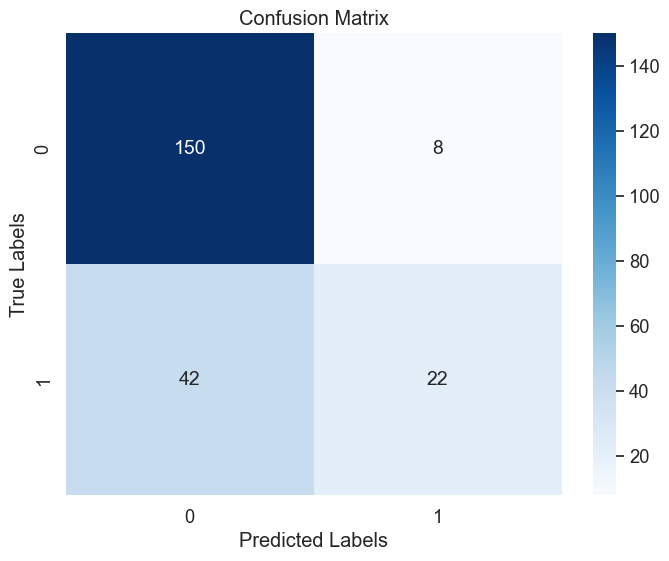

Accuracy: 77.48%

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.95      0.86       158
           1       0.73      0.34      0.47        64

    accuracy                           0.77       222
   macro avg       0.76      0.65      0.66       222
weighted avg       0.77      0.77      0.74       222

Results Using Entropy:


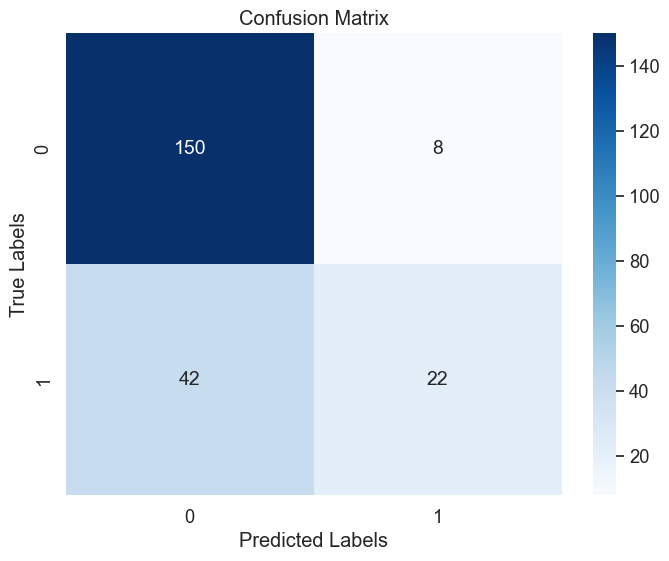

Accuracy: 77.48%

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.95      0.86       158
           1       0.73      0.34      0.47        64

    accuracy                           0.77       222
   macro avg       0.76      0.65      0.66       222
weighted avg       0.77      0.77      0.74       222



In [148]:
class_names = ['Healthy', 'Disease']  # Modify this to represent your actual class labels
clf_gini = train_using_gini(X_train, X_test, y_train, 3)
clf_entropy = train_using_entropy(X_train, X_test, y_train, 3)
# Visualizing the Decision Trees
plot_decision_tree(clf_gini, Features, class_names)
plot_decision_tree(clf_entropy, Features, class_names)

class_names = [str(label) for label in np.unique(y_test)]
print("Results Using Gini Index:")
y_pred_gini = prediction(X_test, clf_gini)
calc_accuracy(y_test, y_pred_gini, class_names)

class_names = [str(label) for label in np.unique(y_test)]
print("Results Using Entropy:")
y_pred_entropy = prediction(X_test, clf_entropy)
calc_accuracy(y_test, y_pred_entropy, class_names)

Train size .5 (50/50)

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)
print(X_train.shape, X_test.shape)

(138, 9) (139, 9)


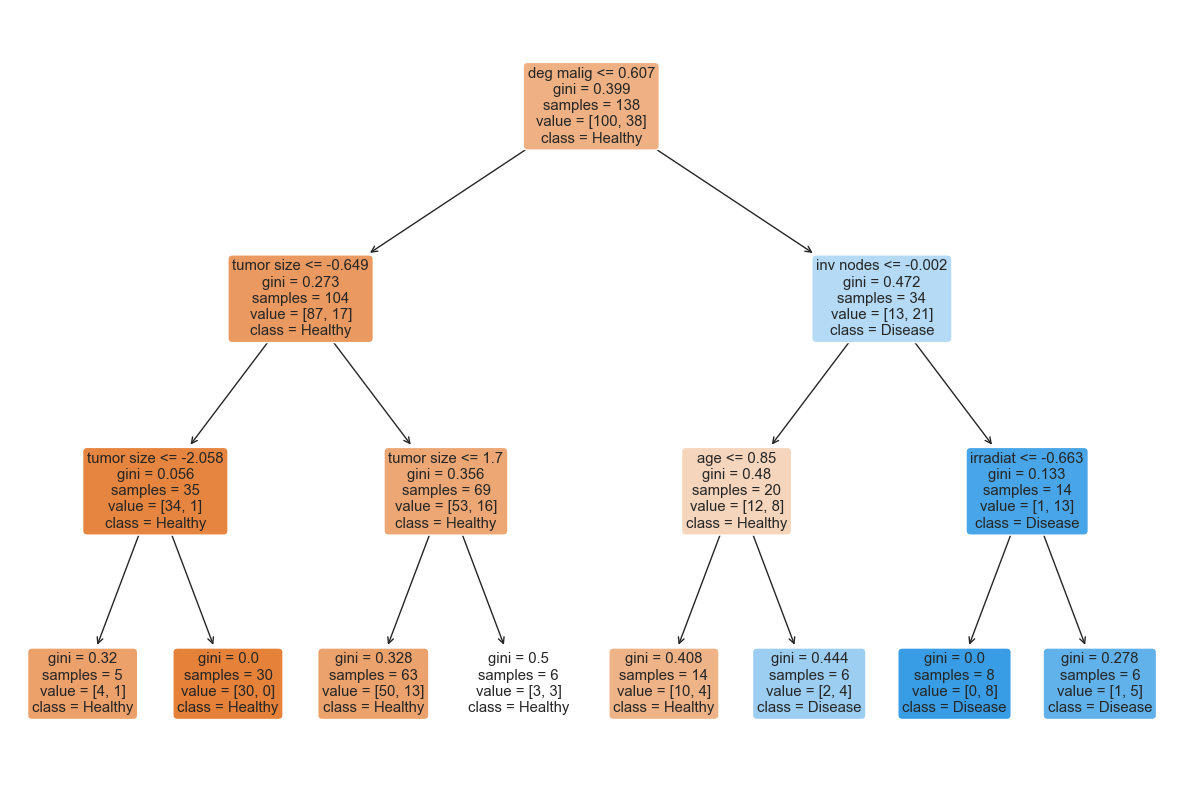

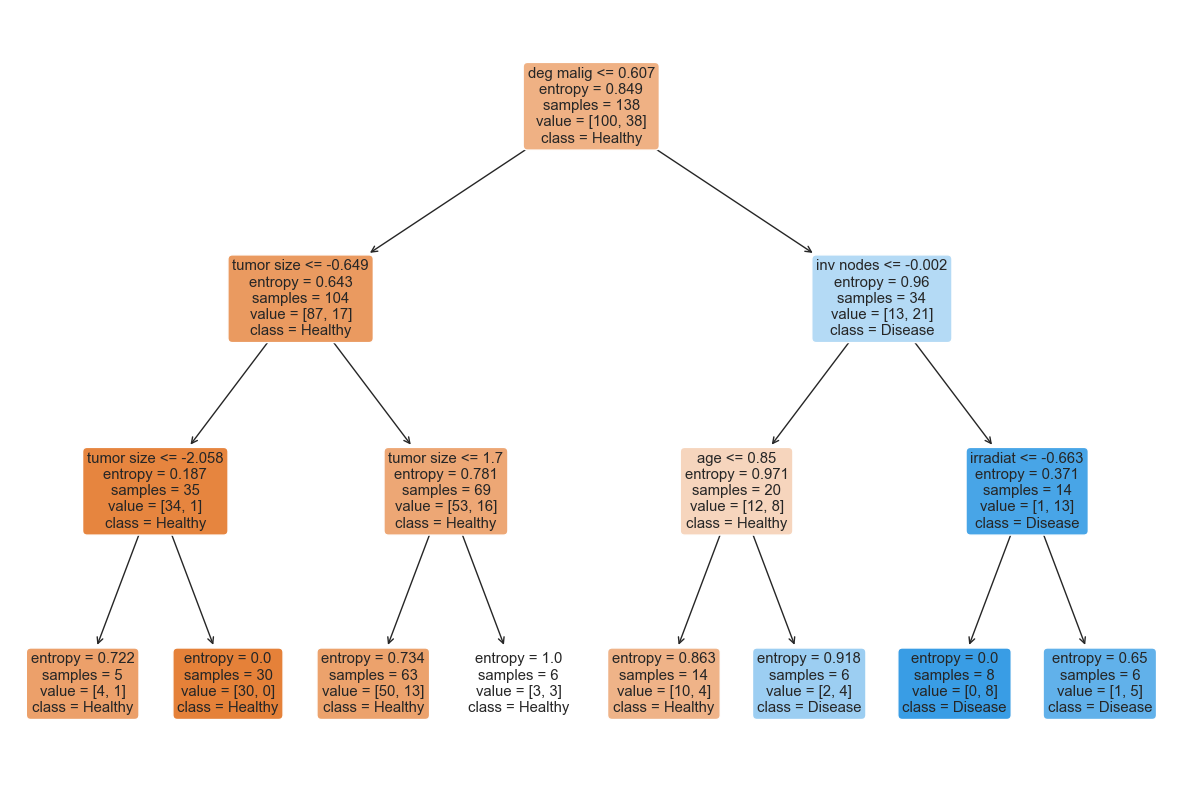

Results Using Gini Index:


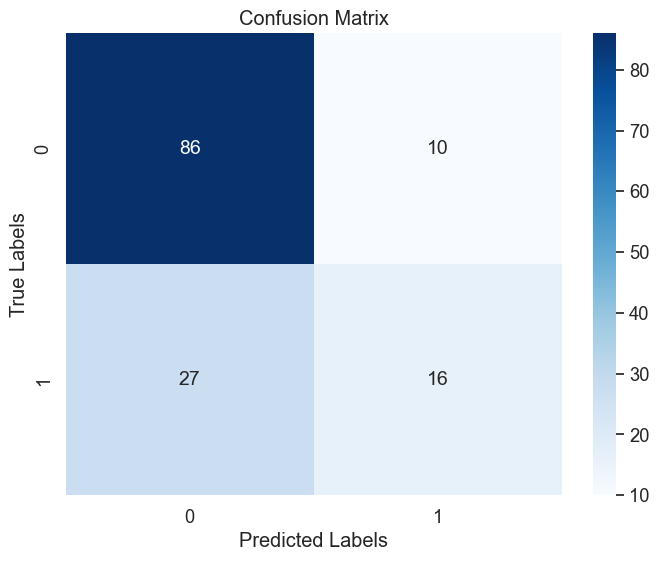

Accuracy: 73.38%

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.90      0.82        96
           1       0.62      0.37      0.46        43

    accuracy                           0.73       139
   macro avg       0.69      0.63      0.64       139
weighted avg       0.72      0.73      0.71       139

Results Using Entropy:


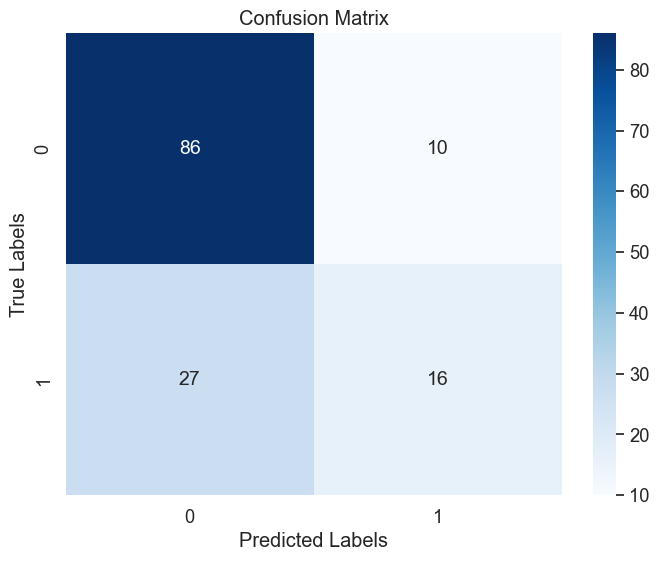

Accuracy: 73.38%

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.90      0.82        96
           1       0.62      0.37      0.46        43

    accuracy                           0.73       139
   macro avg       0.69      0.63      0.64       139
weighted avg       0.72      0.73      0.71       139



In [152]:
class_names = ['Healthy', 'Disease']  # Modify this to represent your actual class labels
clf_gini = train_using_gini(X_train, X_test, y_train, 3)
clf_entropy = train_using_entropy(X_train, X_test, y_train, 3)
# Visualizing the Decision Trees
plot_decision_tree(clf_gini, Features, class_names)
plot_decision_tree(clf_entropy, Features, class_names)

class_names = [str(label) for label in np.unique(y_test)]
print("Results Using Gini Index:")
y_pred_gini = prediction(X_test, clf_gini)
calc_accuracy(y_test, y_pred_gini, class_names)

class_names = [str(label) for label in np.unique(y_test)]
print("Results Using Entropy:")
y_pred_entropy = prediction(X_test, clf_entropy)
calc_accuracy(y_test, y_pred_entropy, class_names)

Train size 0.8

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)

(221, 9) (56, 9)


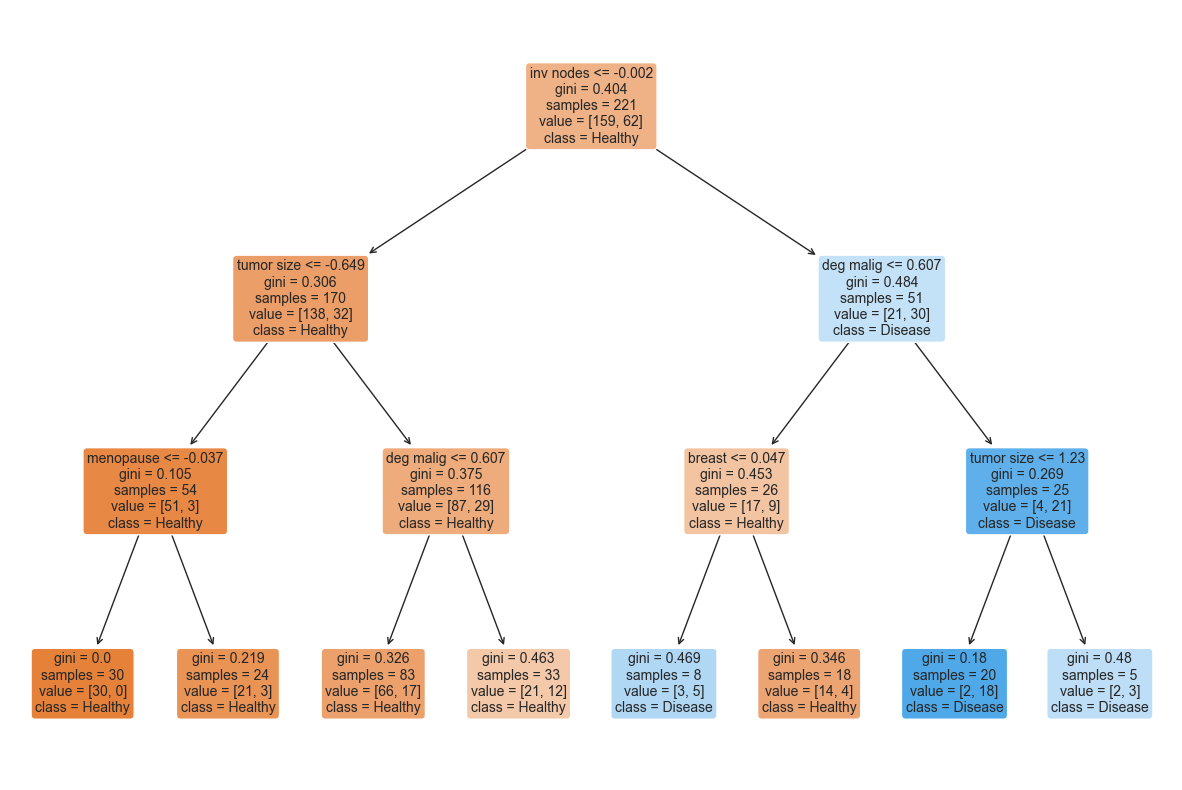

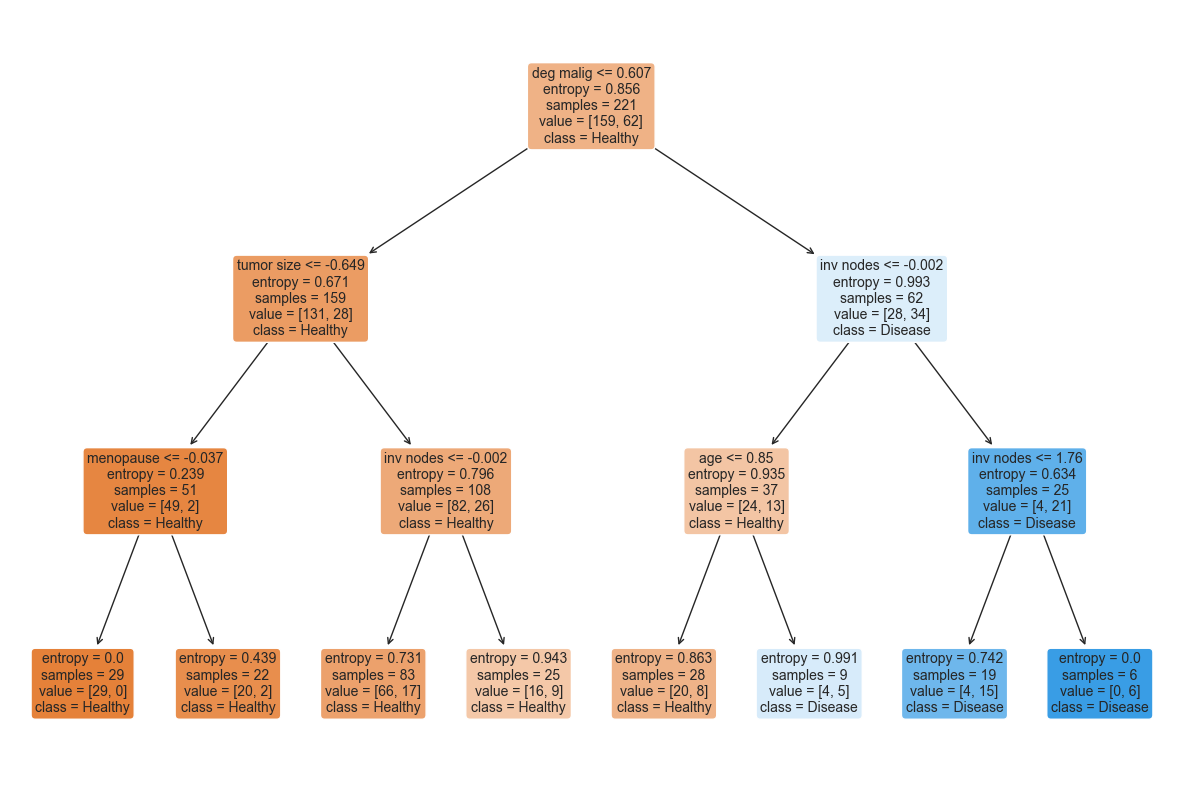

Results Using Gini Index:


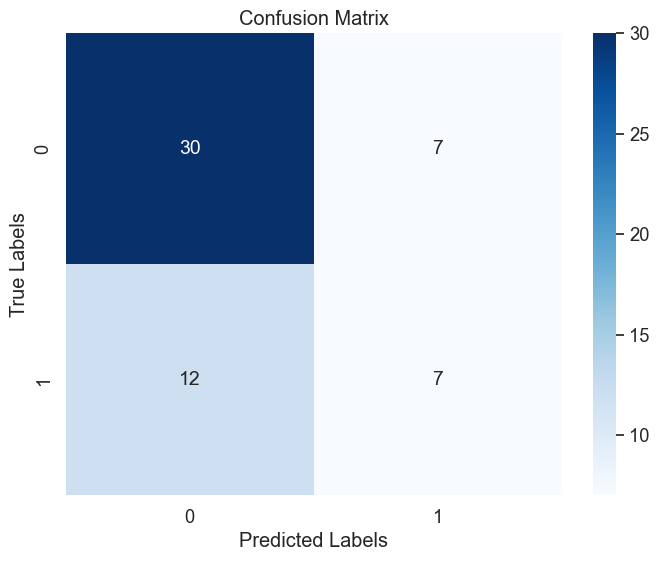

Accuracy: 66.07%

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.81      0.76        37
           1       0.50      0.37      0.42        19

    accuracy                           0.66        56
   macro avg       0.61      0.59      0.59        56
weighted avg       0.64      0.66      0.65        56

Results Using Entropy:


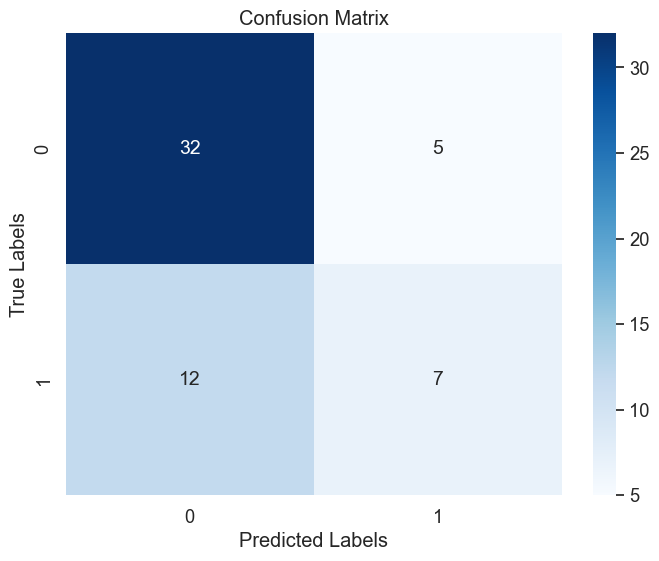

Accuracy: 69.64%

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.86      0.79        37
           1       0.58      0.37      0.45        19

    accuracy                           0.70        56
   macro avg       0.66      0.62      0.62        56
weighted avg       0.68      0.70      0.68        56



In [154]:
class_names = ['Healthy', 'Disease']  # Modify this to represent your actual class labels
clf_gini = train_using_gini(X_train, X_test, y_train, 3)
clf_entropy = train_using_entropy(X_train, X_test, y_train, 3)
# Visualizing the Decision Trees
plot_decision_tree(clf_gini, Features, class_names)
plot_decision_tree(clf_entropy, Features, class_names)

class_names = [str(label) for label in np.unique(y_test)]
print("Results Using Gini Index:")
y_pred_gini = prediction(X_test, clf_gini)
calc_accuracy(y_test, y_pred_gini, class_names)

class_names = [str(label) for label in np.unique(y_test)]
print("Results Using Entropy:")
y_pred_entropy = prediction(X_test, clf_entropy)
calc_accuracy(y_test, y_pred_entropy, class_names)